<a href="https://colab.research.google.com/github/PrajwalPPatil/HierarchicalClustering_MallCustomers/blob/main/HierarchicalClustering_MallCustomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load dataset
dataset=pd.read_csv('/content/Mall_Customers.csv')

In [4]:
# Chcek first five rows
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Check dataset shape
dataset.shape

(200, 5)

In [11]:
# Check columns in dataset
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
# Check null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# Check dataset summary
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
# Check no. of male & female in dataset
dataset['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


In [20]:
# columns of interest
# x=dataset.iloc[:,[3,4]].values
X=dataset.iloc[:, 3:5].values

In [22]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

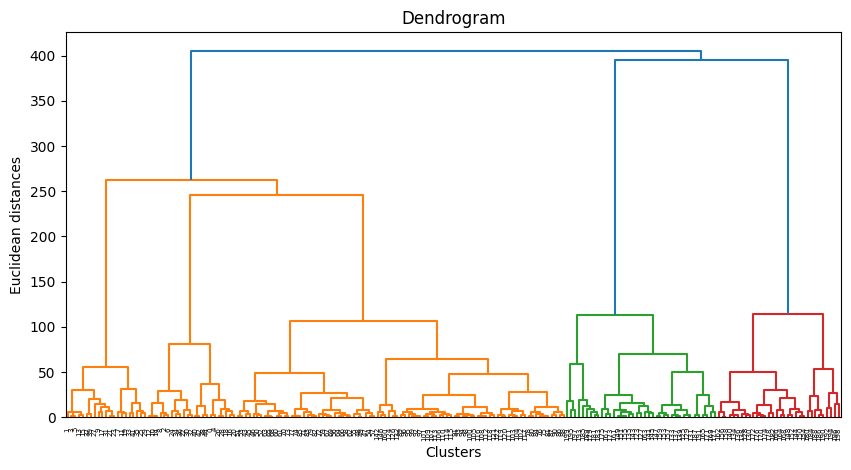

In [24]:
# Using dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
from pylab import rcParams
rcParams['figure.figsize']=10,5
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.show()

In [28]:
# fit the clustering method to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc=hc.fit_predict(x)

In [29]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

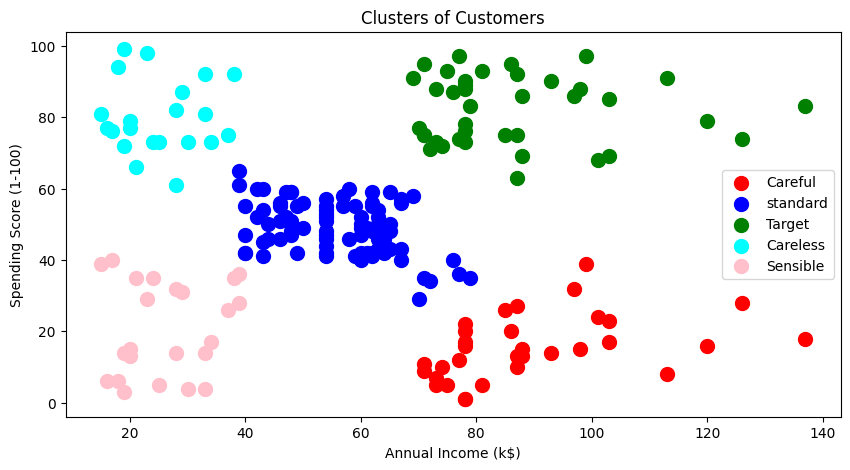

In [36]:
# create a diagram to visualize the clusters
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='Careful')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='standard')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='Target')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='cyan',label='Careless')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='pink',label='Sensible')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [32]:
x[y_hc]

array([[17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [15, 81],
       [17, 40],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81